# Initial Review of the available data sets

This is an initial feasibility study into project MOCAP

## Load Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## Load Smoking Data Set

This data set should in theory correspond to the following technical paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5745355/ as cited on https://ifestos.cse.sc.edu/databases.php

![image.png](attachment:image.png)

In [2]:
!curl "https://ifestos.cse.sc.edu/datasets/smoking_data.tar.gz" > smoking_data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  159M  100  159M    0     0  3705k      0  0:00:44  0:00:44 --:--:-- 1928k     0   952k      0  0:02:51  0:00:01  0:02:50  963k 0     0  4463k      0  0:00:36  0:00:23  0:00:13 3529k


In [ ]:
# File should be 159M compressed, shows 169 in human readable -h option
!ls -lh smoking_data.tar.gz

-rw-r--r-- 1 root root 160M Nov 28 11:07 smoking_data.tar.gz


In [ ]:
#Unpack the file, creates sub-directory smoking_data with csv files
!tar -xvf ./smoking_data.tar.gz

smoking_data/smoking_input.csv
smoking_data/
smoking_data/smoking_targets.csv


In [ ]:
#Housekeeping delete tar file
!rm smoking_data.tar.gz

In [ ]:
#file has no header

X_path = os.path.join('smoking_data','smoking_input.csv')
y_path = os.path.join('smoking_data','smoking_targets.csv')

print(X_path,y_path)

X_data=pd.read_csv(X_path, header=None)
y_data=pd.read_csv(y_path, header=None)

smoking_data/smoking_input.csv smoking_data/smoking_targets.csv


## Feature Exploration

The data analyzed in this study consisted of the three-dimensional accelerometer data collected from the Asus Zenwatch (first generation). The accelerometer onboard the Asus Zenwatch is triaxial and therefore capable of recording acceleration in three principal axes x, y, and z.

During this investigation, a fixed sampling frequency of 20 Hz was used.

In our data, puff duration never exceeded 5 seconds in length. Therefore, the input to the artificial neural network’s gesture recognition system consisted of a set of accelerometer data that spanned 5 seconds of observation sampled at 20 Hz (100 points of data). Each set of data included x, y, and z components of the accelerometer, which necessitated an artificial neural network architecture with 300 input points and one output point

In [ ]:
print(X_data.shape)
X_data.head()

(351530, 300)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,4.8578,4.8555,4.5297,4.10980,3.7406,3.2481,2.96290,2.75890,2.69580,2.183100,2.04270,0.95076,-0.46114,-1.4442,-2.3915,-3.1463,-3.8933,-4.5609,-5.2918,-6.1573,-6.5796,-7.3270,-7.6311,-7.3895,-7.9080,-7.9815,-8.5756,-8.6812,-8.4307,-8.1795,-8.8353,-9.4658,-9.5694,-9.3270,-9.0204,-8.9728,-9.1950,-9.2044,-8.9637,-8.7937,-8.6489,-8.5343,-8.9106,-9.6173,-9.3858,-9.3659,-9.3744,-9.0928,-8.9430,-8.3430,-9.3286,-9.4461,-9.3404,-9.3854,-9.2479,-8.9955,-8.9045,-8.8310,-8.8884,-9.0980,-9.0865,-8.9509,-8.9929,-9.2793,-9.2641,-9.0460,-9.2711,-9.2024,-8.9609,-8.6556,-8.8972,-9.3170,-9.5233,-9.1582,-9.6496,-8.6043,-8.2731,-7.7013,-5.9791,-4.8403,-4.4892,-4.4471,-4.11460,-3.5166,-2.6243,-2.1837,-1.3769,-0.62249,-0.47857,-0.17543,0.41659,0.954420,1.61070,3.4862,3.47780,4.11620,4.74010,6.035300,5.4334,NaN,-6.8187,-6.3362,-6.3973,-6.7201,-7.3497,-7.8945,-8.6731,-8.71210,-8.88290,-10.25300,-11.34100,-10.12800,-8.35240,-7.84720,-7.46940,-6.65180,-6.12940,-5.68460,-5.45600,-5.781400,-5.792400,-4.706400,-3.70920,-2.03510,-1.34050,-0.26984,0.13243,-0.21243,0.30631,0.560800,0.013277,-1.634400,-1.50150,-1.51550,-1.35150,-0.569020,-0.87236,-1.24990,-1.28060,-1.35600,-0.72005,-0.561160,-1.473700,-1.855900,-1.830200,-1.978700,-1.804800,-1.763400,-1.158000,-1.219500,-2.967900,-1.91840,-1.437200,-2.03860,-1.822000,-1.731500,-1.645000,-1.67450,-1.577300,-1.514600,-1.561000,-1.713700,-1.475900,-0.89913,-0.80832,-1.00880,-1.057400,-1.357600,-1.365300,-1.295300,-1.190700,-1.731900,-1.866400,-2.06310,-2.35300,-1.16750,-1.03660,-1.052900,-0.296080,-0.932360,-2.593400,-4.680900,-7.31380,-10.14800,-11.48700,-10.09200,-9.10420,-9.85780,-9.61090,-7.96660,-8.00190,-9.38510,-8.7150,-8.7636,-9.4308,-6.9715,-7.3114,-9.5560,-6.9002,NaN,5.4516,5.8261,5.7054,6.084800,5.83560,5.4543,4.8956,4.7773,4.5575,4.4064,5.4853,6.4755,7.09080,7.46620,6.94230,6.03590,5.1360,4.0310,3.4324,2.6739,2.0811,2.1131,2.7323,3.6568,3.6922,4.4619,4.1517,4.0064,4.4365,4.7910,4.4243,3.8801,3.5640,3.6496,4.0966,4.3953,4.4874,4.2579,4.1855,4.3064,4.3146,4.2793,3.7066,3.4760,3.6671,4.1280,3.8878,3.7251,3.6886,3.1658,3.6505,3.4538,4.3122,4.0442,3.5491,3.5288,3.6318,3.9795,4.1117,4.1144,4.1745,4.1611,3.7423,3.3878,3.6089,3.9150,4.0765,4.2155,4.0776,4.0935,3.8175,3.8700,3.8984,4.1091,3.8916,3.5378,3.8537,4.3000,3.8854,2.7031,3.4015,4.3901,4.1783,5.4003,5.7208,5.92460,6.48200,6.3859,5.6793,5.2479,5.5321,5.3164,4.84220,5.3349,4.1253,4.61110,4.97470,4.939100,4.21430,NaN
1,5.3223,5.3131,4.6459,4.25280,3.6366,3.0777,2.63030,2.44620,1.96530,1.460700,-0.28283,-1.64670,-2.78100,-3.5692,-3.7017,-4.1057,-4.4359,-4.6899,-5.0766,-5.7758,-6.1925,-7.1416,-7.2749,-8.0483,-8.2689,-8.7031,-8.9578,-9.0560,-9.2496,-9.2914,-9.2113,-9.1746,-9.2714,-9.3502,-9.1691,-9.2535,-9.2118,-9.2931,-9.3461,-9.3087,-9.4589,-9.1196,-9.0139,-9.6791,-9.5334,-9.4286,-9.5025,-9.3582,-9.3607,-9.1678,-9.3011,-9.2274,-9.3624,-9.3390,-9.3013,-9.3204,-9.2237,-9.2366,-9.2175,-9.2

In [ ]:
X_data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
           dtype='int64', length=300)

In [ ]:
X_data.isnull().sum()

0          0
1          0
2          0
3          0
4          0
       ...  
295        0
296        0
297        0
298        0
299    19950
Length: 300, dtype: int64

There are some NAN values, lets just drop them for now from both the input and target data sets

In [ ]:
print(X_data.shape,y_data.shape)

#Create an index List of rows containing NaN values
nan_rows=np.unique(list(np.where(X_data.isnull())))

X_data.drop(nan_rows, axis=0, inplace=True)
y_data.drop(nan_rows, axis=0, inplace=True)

print(X_data.shape,y_data.shape)

(351530, 300) (351530, 1)
(331578, 300) (331578, 1)


**Trust but verify**

In [ ]:
X_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Length: 300, dtype: int64

The observations are for 5 seconds at 20Hz = 100 data points for the 3 acceleromters (100 X 3 = 300 data points). Let's splice the 300 columns/datapoints backing into the individual x,y,z set of data points

In [ ]:
Xx=X_data.iloc[0:,:100]
Xy=X_data.iloc[0:,100:200]
Xz=X_data.iloc[0:,200:300]

print(Xx.shape, Xy.shape, Xz.shape)

(331578, 100) (331578, 100) (331578, 100)


Lets create a simple plot for a simple visual comparison of the pattern for the first 5 observations

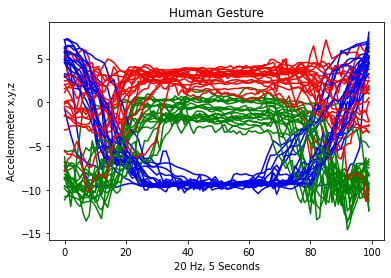

In [ ]:
hz=np.arange(0,100)

for i in range (0,20):
    plt.plot(hz,Xx.iloc[i],'b', label="X" )
    plt.plot(hz,Xy.iloc[i],'g', label="Y" )
    plt.plot(hz,Xz.iloc[i],'r', label="Z" )
    plt.title("Human Gesture")
    plt.xlabel("20 Hz, 5 Seconds")
    plt.ylabel("Accelerometer x,y,z")

plt.show;

## Target Exploration

In [ ]:
print(y_data.shape)
y_data.sample(5)

(331578, 1)


,0
309900,0
314141,0
63502,1
326639,0
61134,1


Check the balance in classes

In [ ]:
y_data.value_counts()

0    174080
1    157498
dtype: int64